In [62]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
# Technically not necessary in newest versions of jupyter
%matplotlib inline

**TRIPLE CHECK WHERE YOUR FILES ARE DOWNLOADED AND UNZIPPED. PLEASE REVIEW VIDEO BEFORE POSTING TO QA FORUMS.**

In [63]:
os.getcwd()

'D:\\hockye_ball classification'

In [64]:
# my_data_dir = 'C:\\Users\\Marcial\\Pierian-Data-Courses\\cell_images'
my_data_dir = os.getcwd()+'//HB_images'

In [65]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir) 

['prediction', 'results', 'test', 'train']

In [66]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'
result_path = my_data_dir+'\\results\\'
prediction = my_data_dir+'\\prediction\\'

In [67]:
os.listdir(train_path)

['balls', 'hockey']

In [68]:
os.listdir(train_path)

['balls', 'hockey']

In [69]:
os.listdir(train_path+'\\balls')[0]

'ball_1.jpg'

In [70]:
para_cell = train_path+'\\balls'+'\\ball_1.jpg'

In [71]:
para_img= imread(para_cell)

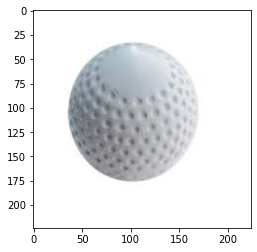

In [72]:
plt.imshow(para_img)

In [73]:
para_img.shape

(224, 224, 3)

**Let's check how many images there are.**

In [74]:
len(os.listdir(train_path+'\\balls'))

29

In [75]:
len(os.listdir(train_path+'\\hockey'))

31

**Let's find out the average dimensions of these images.**

In [76]:
# unifected_cell.shape

In [77]:
# para_img.shape

In [78]:
# Other options: https://stackoverflow.com/questions/1507084/how-to-check-dimensions-of-all-images-in-a-directory-using-python
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\balls'):
    
    img = imread(test_path+'\\balls'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

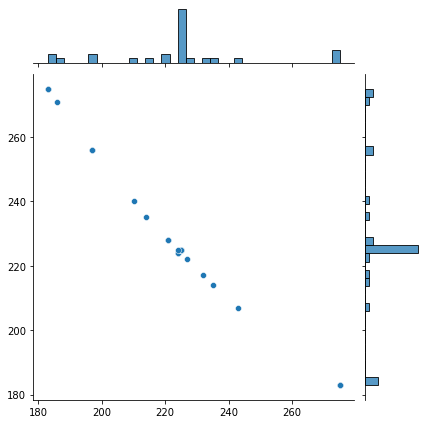

In [79]:
sns.jointplot(dim1,dim2)

In [80]:
np.mean(dim1)

223.9655172413793

In [81]:
np.mean(dim2)

227.41379310344828

In [83]:
image_shape = (223,227,3)

## Preparing the Data for the model

There is too much data for us to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

### Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us. Check out the documentation for a full list of all the parameters you can use here!

In [84]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [85]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [86]:
# image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
#                                width_shift_range=0.10, # Shift the pic width by a max of 5%
#                                height_shift_range=0.10, # Shift the pic height by a max of 5%
#                                rescale=1/255, # Rescale the image by normalzing it.
#                                shear_range=0.1, # Shear means cutting away part of the image (max 10%)
#                                zoom_range=0.1, # Zoom in by 10% max
#                                horizontal_flip=True, # Allo horizontal flipping
#                                fill_mode='nearest' # Fill in missing pixels with the nearest filled value
#                               )
image_gen = ImageDataGenerator(width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

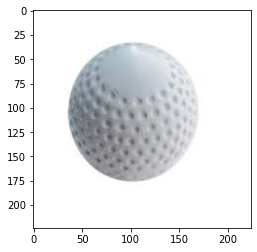

In [87]:
plt.imshow(para_img)

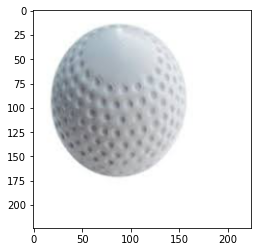

In [88]:
plt.imshow(image_gen.random_transform(para_img))

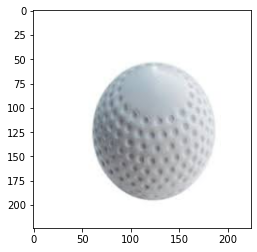

In [89]:
plt.imshow(image_gen.random_transform(para_img))

### Generating many manipulated images from a directory


In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [90]:
image_gen.flow_from_directory(train_path)

Found 60 images belonging to 2 classes.


In [92]:
image_gen.flow_from_directory(test_path)

Found 60 images belonging to 2 classes.


# Creating the Model

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [94]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [95]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 221, 225, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 112, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 108, 110, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 55, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 53, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)            

## Early Stopping

In [96]:
from tensorflow.keras.callbacks import EarlyStopping

In [97]:
early_stop = EarlyStopping(monitor='val_loss',patience=4)

## Training the Model

In [98]:
help(image_gen.flow_from_directory)

Help on method flow_from_directory in module tensorflow.python.keras.preprocessing.image:

flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest') method of tensorflow.python.keras.preprocessing.image.ImageDataGenerator instance
    Takes the path to a directory & generates batches of augmented data.
    
    Arguments:
        directory: string, path to the target directory. It should contain one
          subdirectory per class. Any PNG, JPG, BMP, PPM or TIF images inside
          each of the subdirectories directory tree will be included in the
          generator. See [this script](
            https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)
              for more details.
        target_size: Tuple of integers `(height, width)`, defaults to `(256,
         

In [99]:
batch_size = 5

In [100]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 60 images belonging to 2 classes.


In [101]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 60 images belonging to 2 classes.


In [102]:
train_image_gen.class_indices

{'balls': 0, 'hockey': 1}

In [103]:
import warnings
warnings.filterwarnings('ignore')

In [104]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
12/12 [==============================] - 5s 409ms/step - loss: 0.8437 - accuracy: 0.5167 - val_loss: 0.6792 - val_accuracy: 0.4833
Epoch 2/20
12/12 [==============================] - 4s 373ms/step - loss: 0.6709 - accuracy: 0.5167 - val_loss: 0.6351 - val_accuracy: 0.6000
Epoch 3/20
12/12 [==============================] - 5s 375ms/step - loss: 0.6090 - accuracy: 0.7167 - val_loss: 0.6045 - val_accuracy: 0.6333
Epoch 4/20
12/12 [==============================] - 5s 377ms/step - loss: 0.6624 - accuracy: 0.6833 - val_loss: 0.5327 - val_accuracy: 0.6833
Epoch 5/20
12/12 [==============================] - 4s 372ms/step - loss: 0.6018 - accuracy: 0.6333 - val_loss: 0.6073 - val_accuracy: 0.6500
Epoch 6/20
12/12 [==============================] - 5s 389ms/step - loss: 0.6229 - accuracy: 0.6667 - val_loss: 0.5765 - val_accuracy: 0.9500
Epoch 7/20
12/12 [==============================] - 5s 387ms/step - loss: 0.5448 - accuracy: 0.6667 - val_loss: 0.4376 - val_accuracy: 0.7500
Epoch 

In [105]:
from tensorflow.keras.models import load_model
model.save('malaria_detector.h5')

# Evaluating the Model

In [106]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

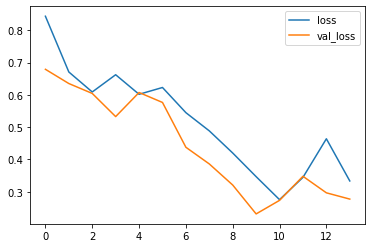

In [107]:
losses[['loss','val_loss']].plot()

In [108]:
model.metrics_names

['loss', 'accuracy']

In [109]:
model.evaluate_generator(test_image_gen)

[0.19244012236595154, 0.9666666388511658]

In [110]:
from tensorflow.keras.preprocessing import image

In [111]:
# https://datascience.stackexchange.com/questions/13894/how-to-get-predictions-with-predict-generator-on-streaming-test-data-in-keras
pred_probabilities = model.predict_generator(test_image_gen)

In [112]:
pred_probabilities

array([[3.3299851e-01],
       [7.4659646e-01],
       [3.6695674e-01],
       [1.1537924e-05],
       [2.5701624e-01],
       [6.6872269e-02],
       [3.4885651e-01],
       [3.5863531e-01],
       [5.2392668e-01],
       [8.0594253e-10],
       [3.5551373e-09],
       [3.8573456e-01],
       [3.0942136e-01],
       [3.9855546e-01],
       [3.4602046e-01],
       [3.7201810e-01],
       [3.0951437e-09],
       [1.6200769e-01],
       [6.0934246e-02],
       [2.5069568e-07],
       [1.6732839e-01],
       [3.7086791e-01],
       [2.2576301e-06],
       [7.0515156e-02],
       [9.4443649e-08],
       [2.6257446e-01],
       [1.6528964e-03],
       [1.2737724e-01],
       [1.9519824e-01],
       [9.5514953e-01],
       [9.0776253e-01],
       [4.4308680e-01],
       [8.5116857e-01],
       [9.8660719e-01],
       [8.2238203e-01],
       [4.4280761e-01],
       [9.8219329e-01],
       [9.9957472e-01],
       [9.7025478e-01],
       [9.6304798e-01],
       [5.0254166e-01],
       [9.403732

In [113]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [114]:
predictions = pred_probabilities > 0.5

In [115]:
# Numpy can treat this as True/False for us
predictions

array([[False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True]])

In [116]:
from sklearn.metrics import classification_report,confusion_matrix

In [117]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.93      0.90      0.92        31

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



In [118]:
confusion_matrix(test_image_gen.classes,predictions)

array([[27,  2],
       [ 3, 28]], dtype=int64)

# Predicting on an Image

In [119]:
# Your file path will be different!
para_cell

'D:\\hockye_ball classification//HB_images\\train\\\\balls\\ball_1.jpg'

In [120]:
test_path

'D:\\hockye_ball classification//HB_images\\test\\'

In [121]:
prediction

'D:\\hockye_ball classification//HB_images\\prediction\\'

In [122]:
for (root,dirs,files) in os.walk(prediction): 
    print(files)

#     para_cell = test_path+'hockey11.jpg'

['ball_1.jpg', 'ball_10.jpg', 'ball_11.jpg', 'ball_12.jpg', 'ball_13.jpg', 'ball_14.jpg', 'ball_15.jpg', 'ball_16.jpg', 'ball_17.jpg', 'ball_18.jpg', 'ball_19.jpg', 'ball_2.jpg', 'ball_20.jpg', 'ball_21.jpg', 'ball_22.jpg', 'ball_23.jpg', 'ball_24.jpg', 'ball_25.jpg', 'ball_26.jpg', 'ball_27.jpg', 'ball_28.jpg', 'ball_29.jpg', 'ball_3.jpg', 'ball_30.jpg', 'ball_4.jpg', 'ball_5.jpg', 'ball_6.jpg', 'ball_8.jpg', 'hockey1.jpg', 'hockey10.jpg', 'hockey11.jpg', 'hockey12.jpg', 'hockey13.jpg', 'hockey14.jpg', 'hockey16.jpg', 'hockey17.png', 'hockey18.jpg', 'hockey19.png', 'hockey2.png', 'hockey20.jpg', 'hockey21.jpg', 'hockey22.jpg', 'hockey23.jpg', 'hockey24.jpg', 'hockey25.jpg', 'hockey26.png', 'hockey27.jpg', 'hockey28.jpg', 'hockey29.jpg', 'hockey3.jpg', 'hockey30.jpg', 'hockey4.png', 'hockey5.jpg', 'hockey6.jpg', 'hockey7.jpg', 'hockey8.jpg', 'hockey9.jpg', 'hockey9.png']


In [123]:
files

['ball_1.jpg',
 'ball_10.jpg',
 'ball_11.jpg',
 'ball_12.jpg',
 'ball_13.jpg',
 'ball_14.jpg',
 'ball_15.jpg',
 'ball_16.jpg',
 'ball_17.jpg',
 'ball_18.jpg',
 'ball_19.jpg',
 'ball_2.jpg',
 'ball_20.jpg',
 'ball_21.jpg',
 'ball_22.jpg',
 'ball_23.jpg',
 'ball_24.jpg',
 'ball_25.jpg',
 'ball_26.jpg',
 'ball_27.jpg',
 'ball_28.jpg',
 'ball_29.jpg',
 'ball_3.jpg',
 'ball_30.jpg',
 'ball_4.jpg',
 'ball_5.jpg',
 'ball_6.jpg',
 'ball_8.jpg',
 'hockey1.jpg',
 'hockey10.jpg',
 'hockey11.jpg',
 'hockey12.jpg',
 'hockey13.jpg',
 'hockey14.jpg',
 'hockey16.jpg',
 'hockey17.png',
 'hockey18.jpg',
 'hockey19.png',
 'hockey2.png',
 'hockey20.jpg',
 'hockey21.jpg',
 'hockey22.jpg',
 'hockey23.jpg',
 'hockey24.jpg',
 'hockey25.jpg',
 'hockey26.png',
 'hockey27.jpg',
 'hockey28.jpg',
 'hockey29.jpg',
 'hockey3.jpg',
 'hockey30.jpg',
 'hockey4.png',
 'hockey5.jpg',
 'hockey6.jpg',
 'hockey7.jpg',
 'hockey8.jpg',
 'hockey9.jpg',
 'hockey9.png']

In [124]:
import shutil
for i in files:
    para_cell = prediction+i
    my_image = image.load_img(para_cell,target_size=image_shape)
    print(my_image)
    type(my_image)
    my_image = image.img_to_array(my_image)
    type(my_image)
    my_image.shape
    my_image = np.expand_dims(my_image, axis=0)
    my_image.shape
    res=model.predict(my_image)
    print(res)
    if res==0:
        shutil.copy(prediction+i, result_path+'ball')
    if res==1:
        shutil.copy(prediction+i, result_path+'hockey')
        

<PIL.Image.Image image mode=RGB size=227x223 at 0x16D370B6910>
[[0.]]
<PIL.Image.Image image mode=RGB size=227x223 at 0x16D3D729400>
[[0.]]
<PIL.Image.Image image mode=RGB size=227x223 at 0x16D3D742FA0>
[[0.]]
<PIL.Image.Image image mode=RGB size=227x223 at 0x16D3D305640>
[[0.]]
<PIL.Image.Image image mode=RGB size=227x223 at 0x16D3D305730>
[[0.]]
<PIL.Image.Image image mode=RGB size=227x223 at 0x16D3D32A0A0>
[[0.]]
<PIL.Image.Image image mode=RGB size=227x223 at 0x16D3D30BF40>
[[0.]]
<PIL.Image.Image image mode=RGB size=227x223 at 0x16D3D35C5B0>
[[0.]]
<PIL.Image.Image image mode=RGB size=227x223 at 0x16D3D29D2E0>
[[1.]]
<PIL.Image.Image image mode=RGB size=227x223 at 0x16D3D292040>
[[0.]]
<PIL.Image.Image image mode=RGB size=227x223 at 0x16D3D31C1C0>
[[0.]]
<PIL.Image.Image image mode=RGB size=227x223 at 0x16D3D283820>
[[1.7203985e-24]]
<PIL.Image.Image image mode=RGB size=227x223 at 0x16D3D3718B0>
[[0.]]
<PIL.Image.Image image mode=RGB size=227x223 at 0x16D3D3D7760>
[[1.]]
<PIL.Imag

In [418]:
para_cell = prediction+"hockey6.jpg"
my_image = image.load_img(para_cell,target_size=image_shape)
print(my_image)
type(my_image)
my_image = image.img_to_array(my_image)
type(my_image)
my_image.shape
my_image = np.expand_dims(my_image, axis=0)
my_image.shape
res=model.predict(my_image)
print(res)

<PIL.Image.Image image mode=RGB size=227x223 at 0x20B932F27C8>
[[1.]]
